# Simple Linear Regression

## Univariate Linear Regression (단변수 선형회귀)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### diabetes dataset
- 나이, 성별, 체질량지수, 혈압, 6가지 혈청 수치를 이용하여 1 년 후의 당뇨병 진행률을 예측

In [2]:
# Load the diabetes dataset
# 나이, 성별, 체질량지수, 혈압, 6가지 혈청 수치  --> already scaled
diabetes = datasets.load_diabetes()
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [3]:
diabetes.data.shape

(442, 10)

In [4]:
diabetes.data[:5]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665645,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02269202, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187235,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03199144, -0.04664087]])

In [5]:
#1년 뒤 측정한 당뇨병의 진행률 - target(label)
diabetes.target[:5]

array([151.,  75., 141., 206., 135.])

In [6]:
df_diab  = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

In [7]:
df_diab.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


## univariate linear regression (단변수 선형회귀) data 생성

In [8]:
# Use only one feature (단변수 선형회귀)

diabetes_X = df_diab['bmi'].values.reshape(-1, 1)
diabetes_X.shape

(442, 1)

In [9]:
# training/testing data set 분할
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes.target, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 1), (89, 1), (353,), (89,))

## sklearn model 이용

In [10]:
# regression object 생성
regr = linear_model.LinearRegression()

In [11]:
# training set 을 이용하여 model 훈련
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# 선형회귀 예측
y_pred = regr.predict(X_test)
y_pred

array([162.68665073, 154.43090162, 121.40790519, 123.47184247,
       246.27611045, 196.7416158 , 109.02428153, 195.70964716,
       200.86949036, 130.69562294, 258.65973411, 109.02428153,
        90.44884604,  82.19309693, 194.67767852,  89.4168774 ,
        92.51278332, 143.0792466 , 119.34396792, 116.248062  ,
       116.248062  , 121.40790519,  91.48081468, 112.12018745,
       128.63168566, 158.55877618, 100.76853243, 119.34396792,
       141.01530932, 194.67767852, 137.91940341, 127.59971703,
       131.72759158, 145.14318388, 109.02428153, 107.99231289,
       106.96034426, 122.43987383, 137.91940341, 110.05625017,
       202.93342763, 111.08821881, 164.75058801, 191.58177261,
       171.97436848, 169.9104312 , 186.42192942,  98.70459515,
       146.17515252, 211.18917674, 115.21609336, 129.6636543 ,
       155.46287026,  86.32097149, 134.82349749, 204.99736491,
       136.88743477,  97.67262651, 212.22114538, 210.1572081 ,
       253.49989092, 167.84649392, 157.52680754, 195.70

- bmi 와 당뇨병 진행률의 상관 관계 시각화

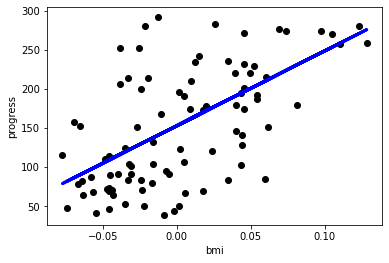

In [13]:
# visualization

plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xlabel('bmi') 
plt.ylabel('progress')
plt.show()

## R2 (R-square, 결정계수) 계산

In [14]:
print("결정계수 : {:.2f}".format(r2_score(y_test, y_pred)))

결정계수 : 0.35


## Multivariate Linear Regression (다변수 선형회귀)

- 시각화를 위해 bmi, bp 두가지 변수를 이용한 Linear Regression  

In [15]:
df_diab.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [16]:
# 2 개의 feature 를 사용
diabetes_X = df_diab[['bmi', 'bp']].values

In [17]:
diabetes_X.shape

(442, 2)

In [18]:
# training/testing data set 분할
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes.target, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 2), (89, 2), (353,), (89,))

In [19]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [20]:
# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
y_pred

array([102.60307566, 171.43425382, 161.06710625, 178.13041875,
       161.7129066 , 135.48341572, 100.08774643, 194.30997241,
        73.439034  , 126.2266058 , 192.5761879 ,  95.32898256,
       232.03950494,  90.74030499, 197.50503808, 222.21614652,
       166.67548995, 123.38268656,  54.09835077, 177.92639635,
       157.66801819, 196.46257265,  68.88429253, 134.10118348,
       112.93628714, 177.40536654, 145.57846582,  87.13739746,
       165.34975023, 282.27781142, 160.72713657,  89.61858766,
       198.04882723, 128.09613467, 168.80573665,  90.5023465 ,
       167.08333181, 199.23861966, 171.26416752, 231.69953525,
        77.72188091, 168.612891  , 131.01930576, 297.23383948,
       259.33401772, 179.69411696,  97.23244752, 152.9431904 ,
       223.45125477,  77.24596393, 110.5569052 , 146.11128111,
       151.41363121, 145.27263512, 110.89687488, 124.69704661,
       133.56857108, 191.99846265,  89.99249344, 144.41163562,
       112.93608421, 168.03516576,  73.60912031,  84.65

In [22]:
# R2 계산 
print("결정계수: {:.2f}".format(r2_score(y_test, y_pred)))

결정계수: 0.33


In [23]:
# 3 차원 시각화 표현을 위해 bmi, bp 의 max, min 구간 meshgrid 작성

bmi_min = X_test[:, 0].min()
bmi_max = X_test[:, 0].max()
bp_min  = X_test[:, 1].min()
bp_max  = X_test[:, 1].max()

bmi_space = np.linspace(bmi_min, bmi_max, 100)
bp_space  = np.linspace(bp_min, bp_max, 100)

X1, X2 = np.meshgrid(bmi_space, bp_space)

X1.shape, X2.shape

((100, 100), (100, 100))

In [24]:
XX = np.column_stack([X1.ravel(), X2.ravel()])
XX

array([[-0.0902753 , -0.09862812],
       [-0.08764064, -0.09862812],
       [-0.08500599, -0.09862812],
       ...,
       [ 0.16528592,  0.10794412],
       [ 0.16792057,  0.10794412],
       [ 0.17055523,  0.10794412]])

In [25]:
Y = regr.predict(XX)
Y

array([ 37.37500795,  39.53530734,  41.69560672, ..., 330.54076205,
       332.70106143, 334.86136081])

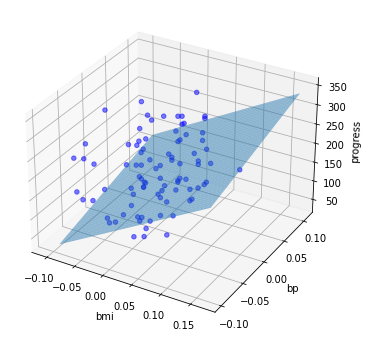

In [31]:
# %matplotlib notebook
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test[:, 0], X_test[:, 1], y_test, c='blue', marker='o', alpha=0.5)
ax.plot_surface(X1, X2, Y.reshape(X1.shape), alpha=0.5)

ax.set_xlabel('bmi')
ax.set_ylabel('bp')
ax.set_zlabel('progress')
plt.show()

In [27]:
# 10 개의 feature 를 모두 사용
diabetes_X = df_diab[['age', 'sex','bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']].values
diabetes_X.shape

(442, 10)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes.target, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)

# R2 계산 
print("결정계수: {:.2f}".format(r2_score(y_test, y_pred)))

결정계수: 0.54
